In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
print(tf.__version__)

2.13.0


# dados

In [2]:
dados = [((0,0,0,0,0,1,0)),
((0,0,0,1,0),(0,1)),
((0,0,0,1,1),(1,0)),
((0,0,1,0,1),(1,0)),
((0,1,0,1,0),(1,0)),
((0,1,0,1,1),(0,1)),
((0,1,1,1,0),(0,1)),
((1,0,0,0,1),(1,0)),
((1,0,0,1,0),(1,0)),
((1,0,0,1,1),(0,1)),
((1,0,1,0,1),(0,1)),
((1,1,0,0,1),(0,1)),
((1,1,1,0,1),(1,0)),
((1,1,1,1,1),(0,1))
]

In [3]:
dados = [((0,0,0,0,0,1,0)),
((0,0,0,1,0,0,1)),
((0,0,0,1,1,1,0)),
((0,0,1,0,1,1,0)),
((0,1,0,1,0,1,0)),
((0,1,0,1,1,0,1)),
((0,1,1,1,0,0,1)),
((1,0,0,0,1,1,0)),
((1,0,0,1,0,1,0)),
((1,0,0,1,1,0,1)),
((1,0,1,0,1,0,1)),
((1,1,0,0,1,0,1)),
((1,1,1,0,1,1,0)),
((1,1,1,1,1,0,1))
]

In [4]:
df = pd.DataFrame(dados, columns=['e1','e2','e3','e4','e5','o1','o2'])

In [5]:
X = df.drop(['o1', 'o2'], axis=1)
y = df[['o1', 'o2']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

# rede

In [7]:
model = keras.Sequential([
    keras.layers.Dense(5, activation='relu', input_shape=(5,)),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(2)
])

In [8]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
optimizer = 'Adam'

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics = ['accuracy'])

# model.compile(loss='mse',
#             optimizer=optimizer,
#             metrics=['mae', 'mse'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
Total params: 72 (288.00 Byte)
Trainable params: 72 (288.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
epochs = model.fit(X_train, y_train, epochs = 25)

Epoch 1/25


1/1 [==============================] - 1s 999ms/step - loss: 4.4377 - accuracy: 0.5455
Epoch 2/25
1/1 [==============================] - 0s 5ms/step - loss: 3.9725 - accuracy: 0.5455
Epoch 3/25
1/1 [==============================] - 0s 9ms/step - loss: 3.9144 - accuracy: 0.5455
Epoch 4/25
1/1 [==============================] - 0s 7ms/step - loss: 3.8732 - accuracy: 0.5455
Epoch 5/25
1/1 [==============================] - 0s 7ms/step - loss: 3.8412 - accuracy: 0.5455
Epoch 6/25
1/1 [==============================] - 0s 10ms/step - loss: 3.8146 - accuracy: 0.5455
Epoch 7/25
1/1 [==============================] - 0s 7ms/step - loss: 3.7918 - accuracy: 0.5455
Epoch 8/25
1/1 [==============================] - 0s 6ms/step - loss: 3.7719 - accuracy: 0.5455
Epoch 9/25
1/1 [==============================] - 0s 8ms/step - loss: 3.7541 - accuracy: 0.5455
Epoch 10/25
1/1 [==============================] - 0s 7ms/step - loss: 3.2898 - accuracy: 0.5455
Epoch 11/25
1/1 [==============================

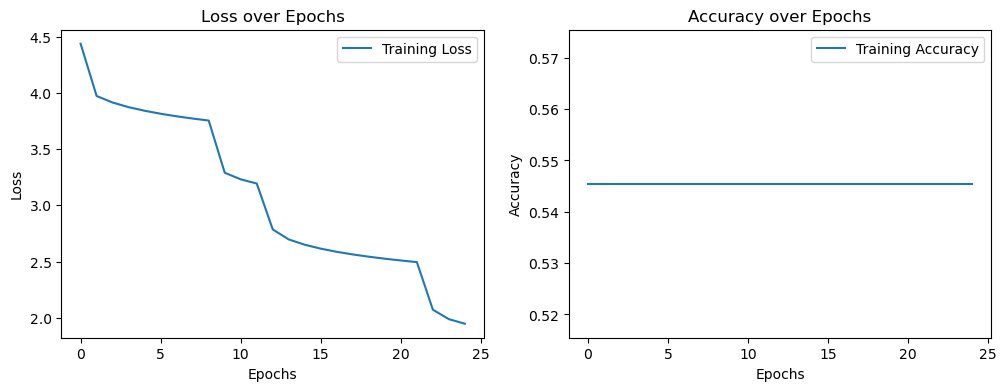

In [11]:
# Plot training loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs.history['loss'], label='Training Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs.history['accuracy'], label='Training Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Avaliar

In [12]:
y_pred_train = model.predict(X_train)
y_pred_train

1/1 [==============================] - 0s 90ms/step


array([[ 0.18537855,  0.11313529],
       [ 0.23177691,  0.03341191],
       [ 0.6641515 ,  0.10739078],
       [ 1.0012536 ,  0.02000384],
       [ 0.18552686,  0.13444299],
       [ 0.15847628,  0.08681348],
       [ 0.30810696,  0.14713986],
       [ 0.04740695,  0.03879118],
       [ 0.8964624 , -0.0064167 ],
       [ 0.13484532,  0.10606843],
       [ 0.07960281,  0.06104772]], dtype=float32)

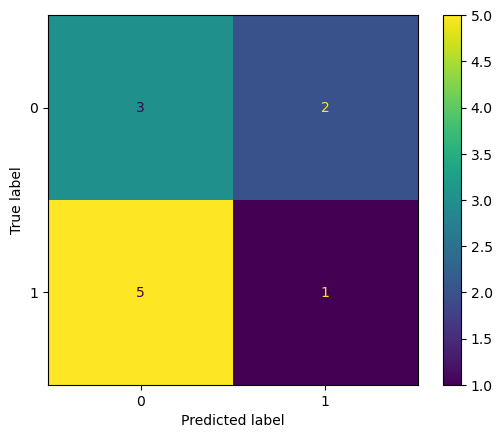

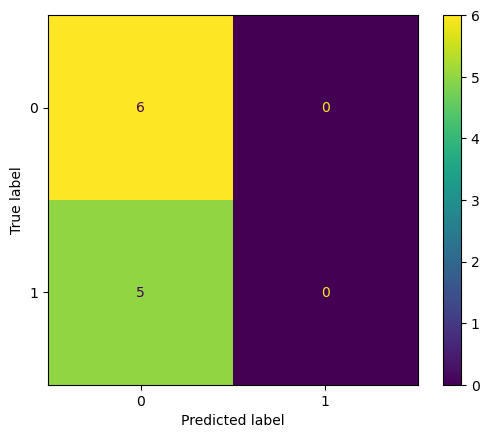

In [13]:
ConfusionMatrixDisplay.from_predictions(np.array(y_train)[:, 0], np.int64(np.round(y_pred_train))[:, 0])
ConfusionMatrixDisplay.from_predictions(np.array(y_train)[:, 1], np.int64(np.round(y_pred_train))[:, 1])
plt.show()

In [14]:
y_pred_test = model.predict(X_test)

1/1 [==============================] - 0s 27ms/step


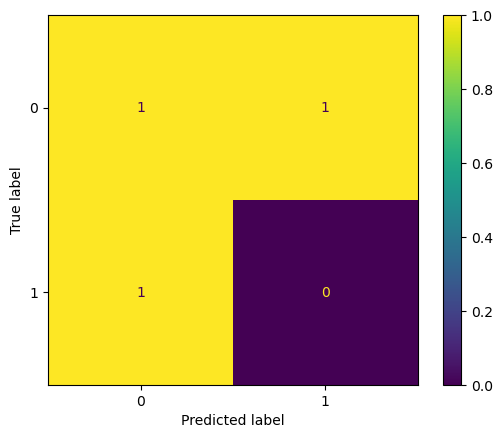

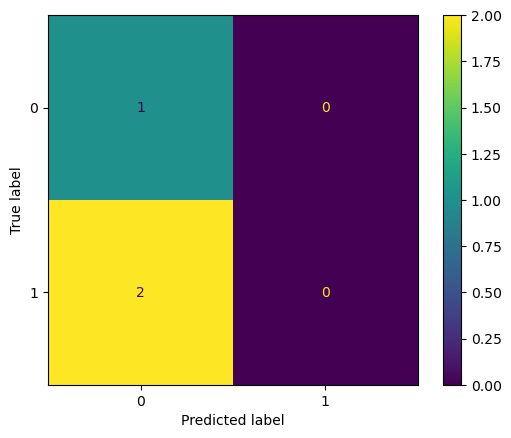

In [15]:
ConfusionMatrixDisplay.from_predictions(np.array(y_test)[:, 0], np.int64(np.round(y_pred_test))[:, 0])
ConfusionMatrixDisplay.from_predictions(np.array(y_test)[:, 1], np.int64(np.round(y_pred_test))[:, 1])
plt.show()

Text(0.5, 1.0, 'Model loss progress during training')

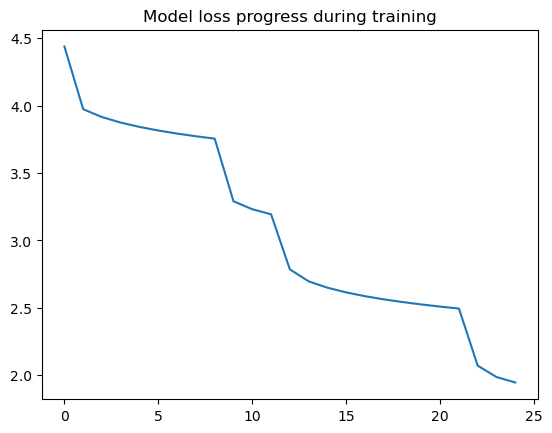

In [16]:
plt.plot(epochs.history['loss'])
plt.title('Model loss progress during training')

Text(0.5, 1.0, 'Model accuracy progress during training')

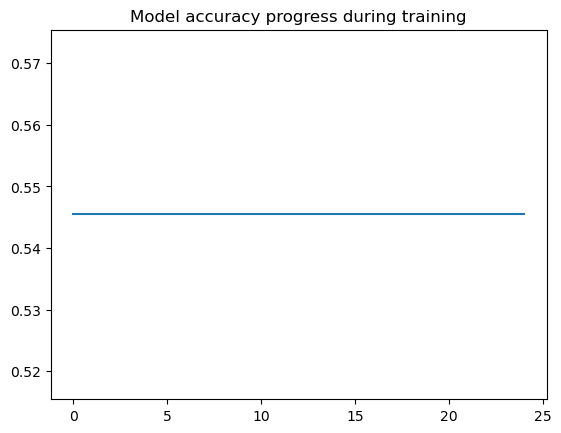

In [17]:
plt.plot(epochs.history['accuracy'])
plt.title('Model accuracy progress during training')

# Another Aproach

## Normal

create a neural network with:
- one input layer of 5 neurons,
- one hidden layer of 5 neurons,
- an output layer of 2 neurons

In [18]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(5,)),        # Input layer with 5 neurons
    tf.keras.layers.Dense(5, activation='relu'),  # Hidden layer with 5 neurons and ReLU activation
    tf.keras.layers.Dense(2, activation='softmax') # Output layer with 2 neurons and softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define your input and output data
# Convert the data into NumPy arrays
input_data = np.array(X)
output_data = np.array(y)

# Train the model
history = model.fit(input_data, output_data, epochs=100)  # You can adjust the number of epochs as needed

# Now, you can use the trained model to make predictions.


Epoch 1/100
1/1 [==============================] - 1s 674ms/step - loss: 0.8378 - accuracy: 0.2857
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.8353 - accuracy: 0.2143
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8328 - accuracy: 0.2143
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 0.8305 - accuracy: 0.2143
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 0.8284 - accuracy: 0.2143
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 0.8263 - accuracy: 0.2143
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 0.8243 - accuracy: 0.2857
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8223 - accuracy: 0.2857
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8204 - accuracy: 0.2857
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 0.8185 - accuracy: 0.2857
Epoch 11/100
1/1 [=======

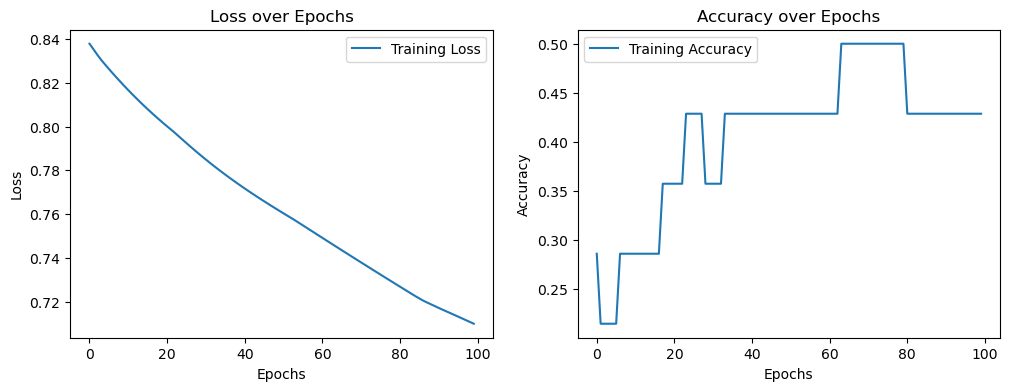

In [19]:
# Plot training loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Controling the Learning Rates

change the learning rate in TensorFlow model by specifying it on the optimizer. The learning rate determines the step size for updating the model's weights during training.

This code allows to:
- iterate through different learning rates,
- recompile the model with each learning rate, and 
- then train the model with that specific learning rate. 

Experiment with different learning rates to find the one that works best for your specific problem.

In [20]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(5,)),        # Input layer with 5 neurons
    tf.keras.layers.Dense(5, activation='relu'),  # Hidden layer with 5 neurons and ReLU activation
    tf.keras.layers.Dense(2, activation='softmax') # Output layer with 2 neurons and softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define your input and output data
# Convert the data into NumPy arrays
input_data = np.array(X)
output_data = np.array(y)

# Train the model
history = model.fit(input_data, output_data, epochs=100)  # You can adjust the number of epochs as needed

# Now, you can use the trained model to make predictions.


Epoch 1/100
1/1 [==============================] - 1s 932ms/step - loss: 0.9461 - accuracy: 0.5714
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 0.9417 - accuracy: 0.5714
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 0.9375 - accuracy: 0.5714
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 0.9334 - accuracy: 0.5714
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 0.9294 - accuracy: 0.5714
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 0.9255 - accuracy: 0.5714
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 0.9215 - accuracy: 0.5714
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 0.9176 - accuracy: 0.5714
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 0.9137 - accuracy: 0.5714
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 0.9099 - accuracy: 0.5714
Epoch 11/100
1/1 [

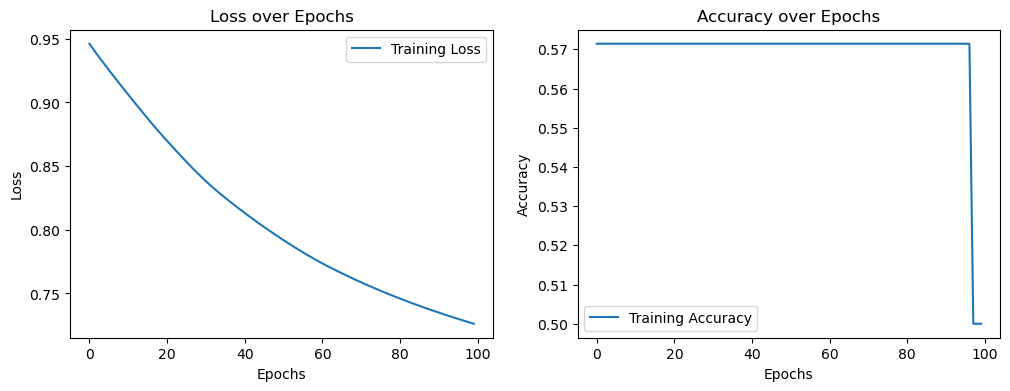

In [21]:
# Plot training loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Early Stop

The validation loss (or error) as a stopping criterion to halt training when it reaches a specific acceptable level.

TensorFlow provides a built-in mechanism called EarlyStopping for this purpose.

In this code, EarlyStopping monitors the validation loss, and if it doesn't improve for a certain number of epochs (determined by patience), training will be stopped.

Adjusting the patience and other parameters to suit specific requirements. This way, training will halt automatically when the validation loss reaches an acceptable level.

In [22]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(5,)),        
    tf.keras.layers.Dense(5, activation='relu'),  
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model as before
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define your input and output data
# Convert the data into NumPy arrays
input_data = np.array(X)
output_data = np.array(y)

# Set up EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    min_delta=0,         # Minimum change in validation loss to be considered an improvement
    patience=10,          # Number of epochs with no improvement before stopping
    verbose=1,           # Print messages about early stopping
    mode='auto'           # Automatically determine the direction of improvement
)

# Train the model with EarlyStopping
history = model.fit(input_data, output_data, epochs=100, validation_split=0.2, callbacks=[early_stopping])

# EarlyStopping will stop training when the validation loss stops improving or deteriorates.


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.7396 - accuracy: 0.5455 - val_loss: 0.5722 - val_accuracy: 0.6667
Epoch 2/100
1/1 [==============================] - 0s 59ms/step - loss: 0.7381 - accuracy: 0.5455 - val_loss: 0.5727 - val_accuracy: 0.6667
Epoch 3/100
1/1 [==============================] - 0s 41ms/step - loss: 0.7366 - accuracy: 0.5455 - val_loss: 0.5732 - val_accuracy: 0.6667
Epoch 4/100
1/1 [==============================] - 0s 48ms/step - loss: 0.7351 - accuracy: 0.5455 - val_loss: 0.5737 - val_accuracy: 0.6667
Epoch 5/100
1/1 [==============================] - 0s 45ms/step - loss: 0.7336 - accuracy: 0.5455 - val_loss: 0.5742 - val_accuracy: 0.6667
Epoch 6/100
1/1 [==============================] - 0s 40ms/step - loss: 0.7321 - accuracy: 0.5455 - val_loss: 0.5747 - val_accuracy: 0.6667
Epoch 7/100
1/1 [==============================] - 0s 51ms/step - loss: 0.7307 - accuracy: 0.5455 - val_loss: 0.5752 - val_accuracy: 0.6667
Epoch 8/100
1/1 [=====

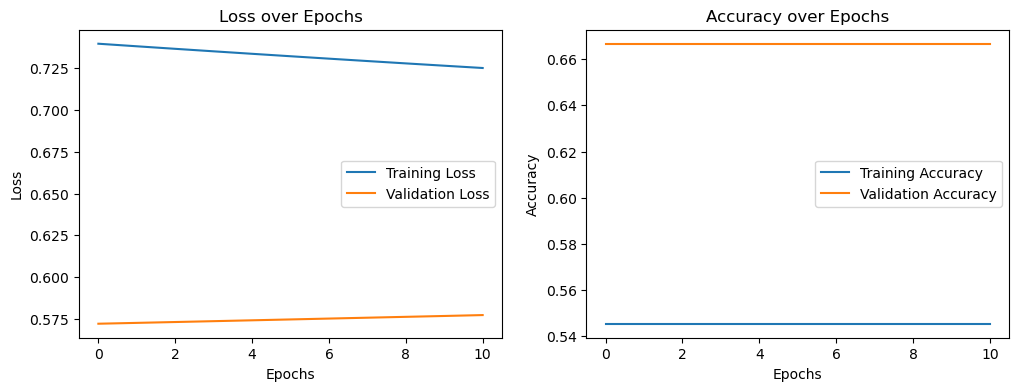

In [23]:
# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()